## Variación espacio-temporal precipitación total

**PROYECTO:** SISTEMA PARA EL SEGUIMIENTO DE ECOSISTEMAS VENEZOLANOS \
**AUTOR:** Javier Martinez

Directorio

In [1]:
import os

print('> Directorio actual: ', os.getcwd())  
os.chdir('../')
print('> Directorio actual: ', os.getcwd()) 

> Directorio actual:  /media/javier/Compartida/doctorado/ssev-analytics/cerro_saroche
> Directorio actual:  /media/javier/Compartida/doctorado/ssev-analytics


In [2]:
from utils.MONGO import CONEXION
from utils.UTILS import *
from datetime import datetime
import pandas as pd

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
import warnings
warnings.filterwarnings('ignore')

Datos de precipitación 

In [4]:
park = 'cerro_saroche'

In [5]:
pd_precipitacion = pd.read_pickle(f'./{park}/data/narx_precipitacion.pkl')
pd_precipitacion['precipitacion_narx'] = pd_precipitacion['prediction_precipitacion_mm']
pd_precipitacion.head()

,park,periodo,year,month,id_point,latitud,longitud,type,precipitacion_mm,prediction_precipitacion_mm,elevacion_media,precipitacion_narx
0,cerro_saroche,1995-02-01,1995,2,1,10.31,-69.83,training,0.340843,0.355879,508.541046,0.355879
1,cerro_saroche,1995-03-01,1995,3,1,10.31,-69.83,training,2.290730,1.841747,508.541046,1.841747
2,cerro_saroche,1995-04-01,1995,4,1,10.31,-69.83,training,1.064486,1.174055,508.541046,1.174055
3,cerro_saroche,1995-05-01,1995,5,1,10.31,-69.83,training,1.114330,1.151622,508.541046,1.151622
4,cerro_saroche,1995-06-01,1995,6,1,10.31,-69.83,training,0.573345,0.850688,508.541046,0.850688


In [6]:
pd_precipitacion.shape

(5655, 12)

In [7]:
pd_historical = pd_precipitacion[pd_precipitacion.type.isin(['training', #'test',
                                                        'validation',
                                                        'prediction'])]
pd_historical.head()

,park,periodo,year,month,id_point,latitud,longitud,type,precipitacion_mm,prediction_precipitacion_mm,elevacion_media,precipitacion_narx
0,cerro_saroche,1995-02-01,1995,2,1,10.31,-69.83,training,0.340843,0.355879,508.541046,0.355879
1,cerro_saroche,1995-03-01,1995,3,1,10.31,-69.83,training,2.290730,1.841747,508.541046,1.841747
2,cerro_saroche,1995-04-01,1995,4,1,10.31,-69.83,training,1.064486,1.174055,508.541046,1.174055
3,cerro_saroche,1995-05-01,1995,5,1,10.31,-69.83,training,1.114330,1.151622,508.541046,1.151622
4,cerro_saroche,1995-06-01,1995,6,1,10.31,-69.83,training,0.573345,0.850688,508.541046,0.850688


<AxesSubplot:>

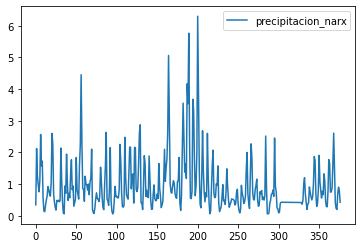

In [8]:
pd_historical.query(f"id_point=={2}")[['precipitacion_narx']].plot()

Preparando los datos

In [9]:
variables = ['year',	'month',	'latitud',	'longitud', 'elevacion_media']

In [10]:
pd_historical[variables+['precipitacion_narx']].corr()

,year,month,latitud,longitud,elevacion_media,precipitacion_narx
year,1.000000e+00,-3.323334e-02,1.975939e-14,3.968588e-15,5.860135e-15,-0.046193
month,-3.323334e-02,1.000000e+00,1.112832e-15,6.411911e-16,8.164272e-17,0.293084
latitud,1.975939e-14,1.112832e-15,1.000000e+00,-3.152214e-13,-9.997471e-02,-0.008147
longitud,3.968588e-15,6.411911e-16,-3.152214e-13,1.000000e+00,7.713106e-01,0.110416
elevacion_media,5.860135e-15,8.164272e-17,-9.997471e-02,7.713106e-01,1.000000e+00,0.121471
precipitacion_narx,-4.619349e-02,2.930841e-01,-8.147027e-03,1.104159e-01,1.214713e-01,1.000000


In [11]:
pd_historical.shape

(5295, 12)

In [12]:
trans_variable = MinMaxScaler()

variables = ['year',	'month',	'latitud',	'longitud', 'elevacion_media']

trans_variable.fit(pd_historical[variables])

data_model = pd_historical[variables].copy()

data_model[variables] = trans_variable.transform(pd_historical[variables]).astype(float)

data_model.head()

,year,month,latitud,longitud,elevacion_media
0,0.0,0.090909,1.0,0.0,0.0
1,0.0,0.181818,1.0,0.0,0.0
2,0.0,0.272727,1.0,0.0,0.0
3,0.0,0.363636,1.0,0.0,0.0
4,0.0,0.454545,1.0,0.0,0.0


In [13]:
# Transformacion
transformacion = LogMinimax.create( pd_historical['precipitacion_narx'].to_numpy() )

data_model['precipitacion_narx'] = transformacion.transformacion()

data_model.head()

,year,month,latitud,longitud,elevacion_media,precipitacion_narx
0,0.0,0.090909,1.0,0.0,0.0,0.441324
1,0.0,0.181818,1.0,0.0,0.0,0.680749
2,0.0,0.272727,1.0,0.0,0.0,0.615171
3,0.0,0.363636,1.0,0.0,0.0,0.612362
4,0.0,0.454545,1.0,0.0,0.0,0.568248


## Red ANN

Data entrenamiento y validación

https://www.section.io/engineering-education/build-ann-with-keras/

In [14]:
data_model.shape

(5295, 6)

In [15]:
test_size = 0.2
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(data_model[variables].to_numpy(), 
                                                    data_model['precipitacion_narx'].to_numpy(), 
                                                    test_size = test_size, 
                                                    random_state = random_state,
                                                    stratify=data_model[['latitud',	'longitud']])

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4236, 5)
(4236,)
(1059, 5)
(1059,)


Generando la red

In [16]:
activation = ['sigmoid', 'sigmoid','sigmoid']

total = X_train.shape[1]

n_neuronas = [total, 2*total, 1]
epochs = 10
patience = 3

In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [18]:
# Metrícas
mae = keras.metrics.MeanAbsoluteError()
rmse = keras.metrics.RootMeanSquaredError()

# ANN
model = keras.models.Sequential()

model.add(keras.layers.Dense(units=n_neuronas[0], activation=activation[0], input_shape=X_train[0].shape))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(units=n_neuronas[1], activation=activation[1]))

model.add(keras.layers.Dense(units=n_neuronas[2], activation=activation[2]))

# Compilando modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[mae,rmse]) 

# Parada temprana
callback = keras.callbacks.EarlyStopping(
                                            monitor="loss",
                                            min_delta=0,
                                            patience=patience,
                                            verbose=0,
                                            mode="min",
                                            baseline=None,
                                            restore_best_weights=False,
                                        )

Entrenamiento

In [19]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=epochs,
                    batch_size=1,
                    verbose=0,
                    workers=2,
                    callbacks=[callback])

print(f'Total epocas:{len(history.epoch)}')

Total epocas:10


Validación

In [20]:
# make predictions
trainPredict = model.predict(X_train, verbose=0).reshape(-1)
testPredict = model.predict(X_test, verbose=0).reshape(-1)

In [21]:
def time_dormat(year = 2003, month = 1):
    """
    Funcion para calcular el periodo
    """

    if month < 10.:
        month = '0'+str(int(month))
    else:
        month = str(int(month))

    return str(int(year))+'-'+month+'-'+'01'

In [22]:
# Training
trainind_pd = pd.DataFrame(y_train,
                            index = list(range(y_train.shape[0])) ,
                            columns=['precipitacion_narx']
                            )

trainind_pd[variables] = X_train
trainind_pd['prediction_ann'] = trainPredict

trainind_pd

,precipitacion_narx,year,month,latitud,longitud,elevacion_media,prediction_ann
0,0.589985,0.724138,0.636364,0.0,1.00,0.497741,0.628891
1,0.578809,0.034483,0.363636,0.0,0.00,0.109229,0.544247
2,0.457660,0.931034,0.000000,1.0,0.75,0.615265,0.495522
3,0.669508,0.931034,0.181818,0.0,0.75,0.607320,0.548693
4,0.492791,0.655172,0.545455,1.0,0.00,0.000000,0.585687
...,...,...,...,...,...,...,...
4231,0.482488,0.724138,0.181818,0.0,1.00,0.497741,0.563074
4232,0.532234,0.034483,0.636364,0.0,0.50,0.657430,0.628303
4233,0.451018,0.448276,0.181818,0.5,0.25,0.349483,0.510674
4234,0.466113,0.655172,1.000000,0.5,0.25,0.349483,0.628939


In [23]:
# Training
trainind_pd = pd.DataFrame(y_train,
                            index = list(range(y_train.shape[0])) ,
                            columns=['precipitacion_narx']
                            )

trainind_pd[variables] = X_train
trainind_pd['prediction_ann'] = trainPredict

trainind_pd[variables] = trans_variable.inverse_transform(trainind_pd[variables])
trainind_pd['precipitacion_narx'] = trainind_pd['precipitacion_narx'].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )
trainind_pd['prediction_ann'] = trainind_pd['prediction_ann'].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )

trainind_pd[['year','month']] = trainind_pd[['year','month']].round(0)

trainind_pd['periodo'] = trainind_pd[['year','month']].apply(lambda x: time_dormat(year = int(x.year), month = int(x.month) ),1)
trainind_pd['periodo'] = pd.to_datetime(trainind_pd['periodo'] )

trainind_pd['type'] = 'training'

trainind_pd.head()

,precipitacion_narx,year,month,latitud,longitud,elevacion_media,prediction_ann,periodo,type
0,0.987609,2016.0,8.0,10.11,-69.43,712.881348,1.290023,2016-08-01,training
1,0.914664,1996.0,5.0,10.11,-69.83,553.383484,0.721445,1996-05-01,training
2,0.398118,2022.0,1.0,10.31,-69.53,761.129150,0.516312,2022-01-01,training
3,1.704954,2022.0,3.0,10.11,-69.53,757.867737,0.743806,2022-03-01,training
4,0.506721,2014.0,7.0,10.31,-69.83,508.541046,0.958893,2014-07-01,training


In [24]:
# Validacion entrenamiento
training_metrics = metrics(observado=trainind_pd['precipitacion_narx'],
                           prediccion=trainind_pd['prediction_ann'])

training_metrics

{'mape': 79.17366759311139,
 'mae': 0.6605419492801115,
 'mse': 1.0956723842699208,
 'rmse': 1.200497973651733,
 'r2': 0.05733823642202951}

In [25]:
# Test
test_pd = pd.DataFrame(y_test,
                        index = list(range(y_test.shape[0])) ,
                        columns=['precipitacion_narx']
                        )

test_pd[variables] = X_test
test_pd['prediction_ann'] = testPredict

test_pd[variables] = trans_variable.inverse_transform(test_pd[variables])
test_pd['precipitacion_narx'] = test_pd['precipitacion_narx'].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )
test_pd['prediction_ann'] = test_pd['prediction_ann'].apply(lambda x: transformacion.inversa(x) if np.isnan(x)==False else np.nan )

test_pd[['year','month']] = test_pd[['year','month']].round(0)
test_pd['periodo'] = test_pd[['year','month']].apply(lambda x: time_dormat(year = x.year, month = x.month),1)
test_pd['periodo'] = pd.to_datetime(test_pd['periodo'] )

test_pd['type'] = 'test'


test_pd.head()

,precipitacion_narx,year,month,latitud,longitud,elevacion_media,prediction_ann,periodo,type
0,1.729434,2011.0,6.0,10.31,-69.73,625.942932,0.989736,2011-06-01,test
1,0.646317,2001.0,7.0,10.31,-69.63,731.954834,1.214169,2001-07-01,test
2,1.958654,1999.0,8.0,10.31,-69.83,508.541046,1.100467,1999-08-01,test
3,0.232756,2002.0,8.0,10.21,-69.73,652.016235,1.183644,2002-08-01,test
4,1.036913,2020.0,11.0,10.31,-69.53,761.129150,1.332259,2020-11-01,test


In [26]:
# Validacion entrenamiento
test_metrics = metrics(observado=test_pd['precipitacion_narx'],
                       prediccion=test_pd['prediction_ann'])

test_metrics

{'mape': 82.94633210220145,
 'mae': 0.5954181414670555,
 'mse': 0.9644802319039321,
 'rmse': 0.9302221177334625,
 'r2': 0.0947302754272028}

In [27]:
pd_trainig_test = pd.concat([trainind_pd,test_pd])
pd_trainig_test.head()

,precipitacion_narx,year,month,latitud,longitud,elevacion_media,prediction_ann,periodo,type
0,0.987609,2016.0,8.0,10.11,-69.43,712.881348,1.290023,2016-08-01,training
1,0.914664,1996.0,5.0,10.11,-69.83,553.383484,0.721445,1996-05-01,training
2,0.398118,2022.0,1.0,10.31,-69.53,761.129150,0.516312,2022-01-01,training
3,1.704954,2022.0,3.0,10.11,-69.53,757.867737,0.743806,2022-03-01,training
4,0.506721,2014.0,7.0,10.31,-69.83,508.541046,0.958893,2014-07-01,training


In [28]:
for_join = pd_historical\
                .groupby(['latitud',	'longitud', 'id_point'],as_index=False)\
                .count()[['latitud',	'longitud', 'id_point']]


pd_final = pd.merge(pd_trainig_test,for_join,on=['latitud',	'longitud'],how = 'left').sort_values(['periodo','id_point'])
pd_final.head()

,precipitacion_narx,year,month,latitud,longitud,elevacion_media,prediction_ann,periodo,type,id_point
1304,0.355879,1995.0,2.0,10.31,-69.83,508.541046,0.332924,1995-02-01,training,1
1456,0.345422,1995.0,2.0,10.31,-69.73,625.942932,0.471437,1995-02-01,training,2
1920,0.280324,1995.0,2.0,10.31,-69.63,731.954834,0.633963,1995-02-01,training,3
403,0.221540,1995.0,2.0,10.31,-69.53,761.129150,0.750702,1995-02-01,training,4
2704,0.283477,1995.0,2.0,10.31,-69.43,726.967285,0.819637,1995-02-01,training,5


In [29]:
pd_tosave = pd.merge(pd_historical,
                        pd_final[['id_point','periodo','prediction_ann']],
                        on = ['id_point','periodo'],
                        how = 'left')

pd_tosave.to_pickle(f'./{park}/data/ann_precipitacion.pkl')

Validación por punto

In [30]:
list_test = []

for id in pd_tosave.sort_values('id_point').id_point.unique():

    data = pd_tosave.sort_values('periodo').query(f"id_point=={id}")

    test = metrics(observado=data['precipitacion_narx'],
                prediccion=data['prediction_ann'],)
    test['id_point'] = id

    list_test.append( pd.DataFrame(test,index=[0]) )

pd_test_id = pd.concat(list_test)
pd_test_id

,mape,mae,mse,rmse,r2,id_point
0,73.474014,0.707136,1.168571,1.365558,0.005163,1
0,88.619053,0.556510,0.826263,0.682710,0.104943,2
0,58.714425,0.835460,1.360094,1.849856,-0.042910,3
0,85.096412,0.510109,0.690323,0.476546,0.156702,4
0,46.473069,0.504979,0.747072,0.558116,0.086794,5
0,134.063826,0.661794,0.989582,0.979273,0.079028,6
0,125.409977,0.555503,0.782741,0.612684,0.102794,7
0,50.632395,0.585362,0.870208,0.757262,0.066002,8
0,65.091282,0.483027,0.656764,0.431339,0.158462,9
0,54.704782,0.948215,1.557222,2.424941,-0.132810,10


Gráfico

In [31]:
rows=5 
cols=3

column_titles = list(map(lambda x: 'Punto id:' + str(int(x)), pd_tosave.sort_values('id_point',ascending=True).id_point.unique().tolist() ))

fig = make_subplots(rows=rows,
                    cols=cols,
                    subplot_titles=column_titles,
                    horizontal_spacing=0.1,
                    vertical_spacing=0.13)

row_order = pd_tosave.sort_values('id_point',ascending=True).id_point.unique().reshape(rows,cols).tolist()

marker_line_width=1.5
marker_size=1.5
line_width=2

for row in range(len(row_order)):

    list_row = row_order[row]
    for col in range(len(list_row)):
        
        if row_order[row][col]==1:
            showlegend=True
        else:
            showlegend=False
            
            
        data_fig = pd_tosave.sort_values('id_point',ascending=True).query(f"id_point=={row_order[row][col]}")
        data_fig = data_fig.sort_values('periodo',ascending=True)

        fig.add_trace(
            go.Scatter(x=data_fig['periodo'],
                       #y=data_fig.total_precipitation_mm,
                       y=data_fig['precipitacion_narx'],
                       mode='lines+markers',
                       name='p(t)',# Id: {id}'.format(id=id_),
                       marker_symbol='square',
                       marker_line_width=marker_line_width,
                       marker_size=marker_size,
                       marker_line_color='#4F64B4',
                       marker_color='#4F64B4', 
                       line=dict(color='#004CFF', width=line_width),
                       legendgroup='group1',
                       showlegend=showlegend,
                       
                      ),
            row=row+1, 
            col=col+1,
                
        )
        
        fig.add_trace(
            go.Scatter(x=data_fig['periodo'],
                       #y=data_fig.total_precipitation_mm,
                       y=data_fig['prediction_ann'],
                       mode='lines+markers',
                       name='Predicción',# Id: {id}'.format(id=id_),
                       #line=dict(color='#00B4B1', width=2),
                       marker_symbol='star',
                       marker_line_width=marker_line_width,
                       marker_size=marker_size,
                       marker_line_color='#C60000',
                       marker_color='#C60000',
                       line=dict(color='#00C6BB', width=line_width,dash='dot'),
                       legendgroup='group1',
                       showlegend=showlegend,
                       
                      ),
            row=row+1, 
            col=col+1,
                
        )

        
        fig.update_xaxes(title_text='Mes',title_font=dict(size=12),
                         range=[data_fig.periodo.max() - pd.DateOffset(months=4*12),
                                data_fig.periodo.max()])
        fig.update_yaxes(title_text='Precipitación (mm)',
                         title_font=dict(size=12),
                         range=[0,6]
                        )

# fig['layout']['title']['y']=0.98
# fig['layout']['margin']['t']=100
        
#        
fig.update_xaxes(tickformat="%Y/%m",showline=True, linewidth=1, linecolor='black', gridcolor='#E4E4E4',mirror=True,
                 ticks="outside", tickwidth=2, tickcolor='#5C2B05', ticklen=10)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='#E4E4E4',mirror=True,
                 ticks="outside", tickwidth=2, tickcolor='#5C2B05', ticklen=10)        
fig.update_layout( height=800,
                   width=1500,
                   showlegend = True,
                   font = dict(size = 14),
                   template='plotly_white',
                   title_text="""
                             Modelo Espacio Temporal: Precipitación total
                             <br><sup>Parque {parque}</sup>
                             """.format(parque='Cerro Saroche'),
                   #xaxis_range=['1980-01-01','2023-01-01'],
                   legend_title_text='Serie',
                   legend_title = dict( font = dict(size = 14)),
                   uniformtext_minsize=8,
                   uniformtext_mode='hide',
                   legend = dict(
                                #orientation="h",
                                yanchor="bottom",
                                y=1.05,
                                xanchor="right",
                                x=1,
                                font_size=14
                            )
                 )


fig.write_image(f'./{park}/figures/ann_precipitacion.png')
fig.show()